# **Lezione 2**
### **Esercizio 2.1**

La richiesta è di calcolare l'integrale 1D:
$$
I = \int _0^1 \frac{\pi}{2} \cos(\frac{\pi}{2}x)dx = 1
$$
tramite due metodi montecarlo e confrontarli.

##### **1. Il Metodo della Media**
Il più semplice tra i due si basa sulla seguente idea: se scelgo $N$ punti $x_i$ indipendenti e uniformemente distribuiti in $[0,1)$, allora la media dei valori $f(x_i)$ fornisce una buona stima dell'integrale:
$$
I \approx \frac{1}{N}\sum_{i=1}^N f(x_i)  \hspace{0.75cm}  x_i\in [0,1)
$$
Questo metodo ha dei vantaggi immediati: è semplicissimo da utilizzare e implementare e non richiede la conoscenza della forma di $f(x)$. Tuttavia, proprio per questo, se $f(x)$ varia molto il metodo può risultare inefficiente: se si scelgono punti x uniformemente tra 0 e 1, molti di questi capiteranno in zone dove $f(x)$ è piccola quindi contribuiranno poco all’integrale ma comunque aggiungeranno rumore (variazioni casuali non utili) che si accumulerà e farà aumentare l’errore sulla media finale.

##### **2. Importance Sampling**
Proprio per aumentare l'efficienza si introduce il metodo dell’importance sampling per il calcolo integrale. Invece di utilizzare una distribuzione uniforme per campionare il nostro integrale, possiamo mostrare come, l'utilizzo di una distribuzione più simile all'integranda, possa velocizzare la convergenza della stima.

In pratica, si riscrive l’integrale in modo da includere una funzione di densità di probabilità $p(x)$:
$$
I=\int f(x)dx =\int \frac{f(x)}{p(x)}p(x)dx
$$
scegliendola in modo da “concentrare” i punti casuali nelle zone dove la funzione $f(x)$ assume valori rilevanti. In questo modo, il rapporto $\frac{f(x)}{p(x)}$ tende ad oscillare meno, e questo si traduce in una stima più stabile e meno rumorosa. Il metodo è quindi particolarmente utile quando $f(x)$ è molto piccata o concentrata in certe regioni.

Nel caso dell'esercizio:
* l'integranda è $ f(x)=\frac{\pi}{2} \cos(\frac{\pi}{2}x)$

* ho scelto come funzione di densità di probabilità lo sviluppo al primo ordine dell'integranda centrato in $x=1$, che dopo normalizzazione è $ p(x)=2-2x $

* per campionare $x$ secondo questa nuova distribuzione usiamo il metodo della cumulativa inversa, ossia, generando uniformemente $y\in [0,1)$ allora il valore $x = 1 + \sqrt{1-y}$ sarà distribuita come $p(x)$

##### **Risultati**
Seguono i grafici dell'andamento di media e varianza nei blocchi e del loro errore relativo, sia per il metodo della media che per l'importance sampling.

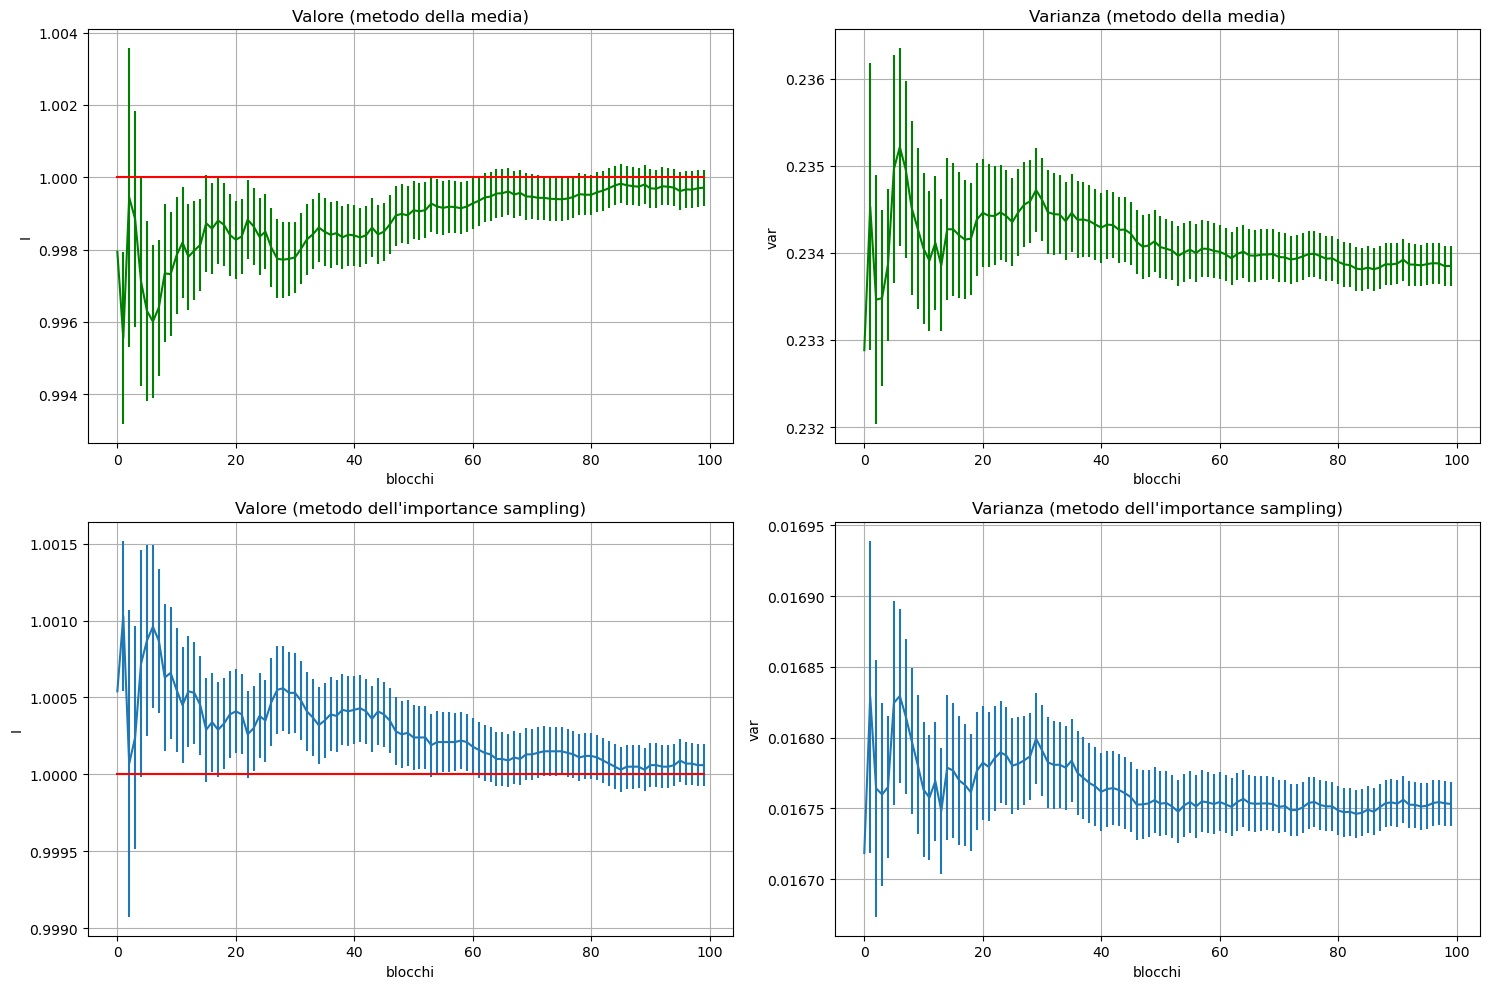

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

N=100
x = np.arange(N)
I=np.full_like(x,1)

media, err1, var1, std1= np.loadtxt("Files/media.dat", usecols=(0,1,2,3), delimiter='\t', unpack='True')
samp, err2, var2, std2= np.loadtxt("Files/sampling.dat", usecols=(0,1,2,3), delimiter='\t', unpack='True')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0,0].errorbar(x,media,yerr=err1,color="green")
axes[0,0].plot(x,I, color='red', linewidth=1.5)
axes[0,0].set_title("Valore (metodo della media)")
axes[0,0].set_xlabel("blocchi")
axes[0,0].set_ylabel("I")
axes[0,0].grid(True)

axes[0,1].errorbar(x,var1,yerr=std1, color="green")
axes[0,1].set_title("Varianza (metodo della media)")
axes[0,1].set_xlabel("blocchi")
axes[0,1].set_ylabel("var")
axes[0,1].grid(True)

axes[1,0].errorbar(x,samp, yerr=err2)
axes[1,0].plot(x,I, color='red', linewidth=1.5)
axes[1,0].set_title("Valore (metodo dell'importance sampling)")
axes[1,0].set_xlabel("blocchi")
axes[1,0].set_ylabel("I")
axes[1,0].grid(True)

axes[1,1].errorbar(x,var2,yerr=std2)
axes[1,1].set_title("Varianza (metodo dell'importance sampling)")
axes[1,1].set_xlabel("blocchi")
axes[1,1].set_ylabel("var")
axes[1,1].grid(True)

plt.tight_layout()
plt.show()

Nel confronto tra i due metodi, una delle differenze più significative risiede nella varianza dei risultati:
+ Nel metodo della media, i punti vengono campionati uniformemente indipendentemente dalla forma della funzione integranda. Questo fa si che molti punti ricadano in regioni dove il contributo della funzione è trascurabile, aumentando la fluttuazione statistica e quindi la varianza della stima.  

+ L’importance sampling, al contrario, utilizza una distribuzione di probabilità $p(x)$ scelta in modo da assomigliare alla forma dell’integranda. In questo modo, i punti vengono concentrati nelle zone dove la funzione assume valori rilevanti, riducendo sensibilmente la dispersione dei risultati.   

Di conseguenza, a parità di campioni, l’importance sampling produce una stima dell’integrale con varianza inferiore rispetto alla media semplice (un ordine di grandezza), rendendolo più efficiente.

### **Esercizio 2.2**
Lo scopo di questo esercizio è studiare il comportamento di una particella che compie un "random walk (RW)" partendo sempre dall'origine. Si studiano due diversi scenari nello spazio tridimensionale:
1. RW su un reticolo cubico (di passo $a=1$), ad ogni passo la particella può muoversi in maniera equiprobabile in una delle sei dimensioni corrispondenti agli assi cartesiani ($\pm x, \pm y, \pm z$). La scelta ad ogni passo viene svolta dalla funzione:
    ```cpp
    void walker(vector<double>& posizione, double step, Random& rnd){
        double num = rnd.Rannyu() * 3;
        if (num < 1) {
            if (rnd.Rannyu() < 0.5) {posizione[0] += step;
            } else { posizione[0] -= step;}
        } else if (num < 2) {
            if (rnd.Rannyu() < 0.5) { posizione[1] += step;
            } else { posizione[1] -= step;}
        } else {
            if (rnd.Rannyu() < 0.5) { posizione[2] += step;
            } else { posizione[2] -= step;}
        }
        return;
    }
    ```
2. RW nel continuo: ad ogni passo (lungo $a=1$), la particella sceglie di muoversi in una direzione casuale nello spazio tridimensionale, campionando in modo uniforme l'angolo solido. Ogni passo viene fatto dalla funzione:

    ```cpp
    void walker_cont(vector<double>& posizione, double step, Random& rnd){
        double phi = rnd.Rannyu()*2*M_PI;
        double theta = rnd.Seno();
        posizione[0]+= step*sin(theta)*cos(phi);
        posizione[1]+= step*sin(theta)*sin(phi);
        posizione[2]+= step*cos(theta);    
        return;
    }
    ```
    Dove theta è estratta in modo tale da campioare uniformemente l'angolo solido totale.

L'obbiettivo è calcolare la radice della distanza quadratica media $\sqrt{\langle \vec{r}_N\ ^2 \rangle}$, ossia la distanza media percorsa, dopo $N=100$ passi. Ci si aspetta che entrambi gli scenari mostrino un comportamento diffusivo, cioè una crescita proporzionale a $\sqrt{N}$. 

Per verificare le ipotesi, seguono i plot richiesti. Si confrontano i due casi graficamente e si stima la costante $k$ del fit $f(N)=k \sqrt{N}$.

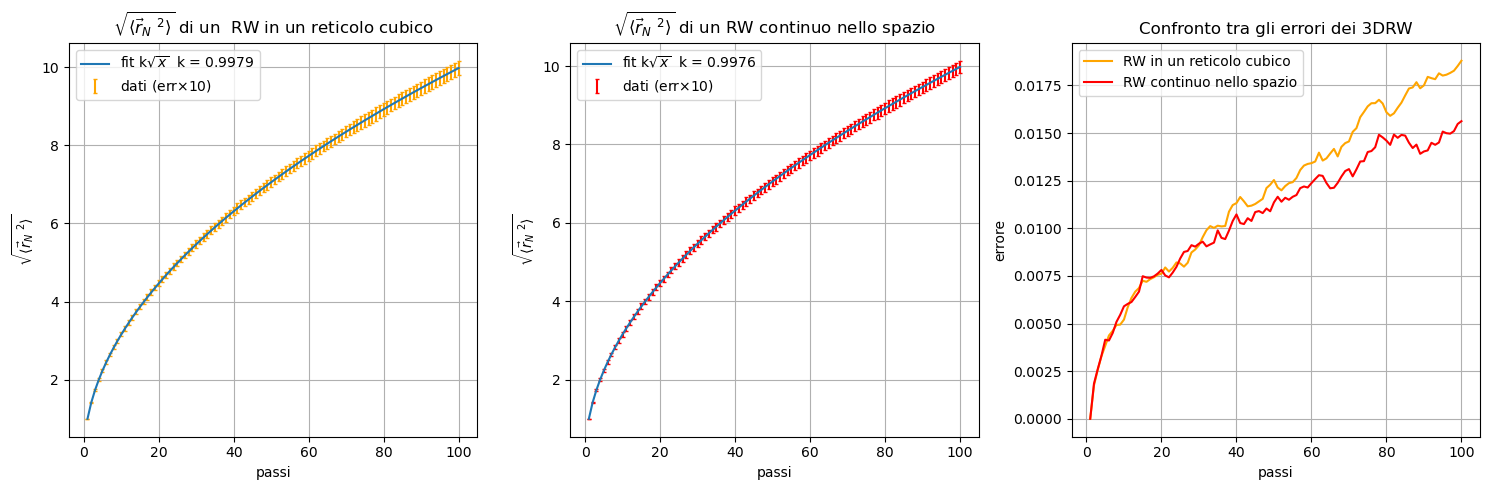

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

N=100
x = np.arange(N)+1
cubic, err1 = np.loadtxt("Files/cubic_lattice.dat", usecols=(0,1), delimiter='\t', unpack='True')
cont, err2= np.loadtxt("Files/continuum.dat", usecols=(0,1), delimiter='\t', unpack='True')

def fit_func(N, k):
    return k * np.sqrt(N)

par_cubic, cov_cubic = curve_fit(fit_func, x, cubic) 
#array con parametri fittati, matrice di covarianza (errori e correlazioni tra i parametri)
k_cubic = par_cubic[0]
k_err1 = np.sqrt(cov_cubic[0, 0])
cubic_fit = fit_func(x, k_cubic)

par_cont, cov_cont = curve_fit(fit_func, x, cont)
k_cont = par_cont[0]
k_err2 = np.sqrt(cov_cont[0, 0])
cont_fit = fit_func(x, k_cont)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].errorbar(x, cubic, yerr=err1*10, color="orange", label=r"dati (err$\times$10)", capsize=1.5, linestyle=" ", alpha=1)
axes[0].set_title(r"$\sqrt{\langle \vec{r}_N\ ^2 \rangle}$ di un  RW in un reticolo cubico")
axes[0].plot(x, cubic_fit, label=rf"fit k$\sqrt{{x}}$  k = {k_cubic:.4f}")
axes[0].set_xlabel("passi")  
axes[0].set_ylabel(r"$\sqrt{\langle \vec{r}_N\ ^2 \rangle}$") 
axes[0].legend()
axes[0].grid(True)

axes[1].errorbar(x, cont, yerr=err2*10, color="red", label=r"dati (err$\times$10)", capsize=1.5, linestyle=" ", alpha=1)
axes[1].set_title(r"$\sqrt{\langle \vec{r}_N\ ^2 \rangle}$ di un RW continuo nello spazio")
axes[1].set_xlabel("passi")  
axes[1].set_ylabel(r"$\sqrt{\langle \vec{r}_N\ ^2 \rangle}$") 
axes[1].plot(x, cubic_fit, label=rf"fit k$\sqrt{{x}}$  k = {k_cont:.4f}")
axes[1].legend()
axes[1].grid(True)

axes[2].plot(x, err1, label="RW in un reticolo cubico", linestyle='-', color="orange")  
axes[2].plot(x, err2, label="RW continuo nello spazio", linestyle='-', color="red") 
axes[2].set_xlabel("passi")  
axes[2].set_ylabel("errore")  
axes[2].set_title("Confronto tra gli errori dei 3DRW")  
axes[2].legend()  
axes[2].grid(True)  

plt.tight_layout()
plt.show()  

Nel corso della simulazione dei random walk tridimensionali, sia su reticolo che nel continuo, si osserva che la distanza media radiale $\sqrt{\langle \vec{r}_N\ ^2 \rangle}$ cresce in funzione del numero di passi $N$ come $\sqrt{N}$, in accordo con la teoria della diffusione. Infatti il random walk può essere descritto come un processo di Markov, in cui ogni nuovo stato (posizione della particella) dipende unicamente dallo stato immediatamente precedente, e non dalla storia complessiva del cammino.

È importante notare che anche l'errore di $\sqrt{\langle \vec{r}_N\ ^2 \rangle}$ tende a crescere con $\sqrt{N}$. Questo avviene perché, mantenendo fisso il numero di campioni (o meglio, a blocco fissato), la dispersione tra i risultati di diversi cammini aumenta con la distanza percorsa. In particolare, la varianza della quantità $\langle \vec{r}_N\ ^2 \rangle$ cresce linearmente con $N$, e di conseguenza anche l’errore sulla sua radice quadrata risulta proporzionale a $\sqrt{N}$.